# Name : Preyash Patel
# BannerWeb : 000793739
# Data Science Final Project

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
employee_data = pd.read_csv(file_path)
print(employee_data)

# Get the size of the dataset (number of rows)
dataset_size = len(employee_data)

# Get the number of measurements (columns) in the dataset
num_measurements = employee_data.shape[1]

# Get the type of measurements (data types of each column)
measurement_types = employee_data.dtypes

# Get the number of classes and their labels (for classification tasks)
if 'class_label' in employee_data.columns:  # Replace 'class_label' with the actual column name containing labels
    num_classes = employee_data['class_label'].nunique()
    class_labels = employee_data['class_label'].unique()
else:
    num_classes = None
    class_labels = None

# Print the dataset description
print("Dataset Size:", dataset_size)
print("Number of Measurements:", num_measurements)
print("Type of Measurements:")
print(measurement_types)
print("Number of Classes:", num_classes)
print("Class Labels:", class_labels)


      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors         2017  Bangalore            3   34    Male          No   
1     Bachelors         2013       Pune            1   28  Female          No   
2     Bachelors         2014  New Delhi            3   38  Female          No   
3       Masters         2016  Bangalore            3   27    Male          No   
4       Masters         2017       Pune            3   24    Male         Yes   
...         ...          ...        ...          ...  ...     ...         ...   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4649    Masters         2013       Pune            2   37    Male          No   
4650    Masters         2018  New Delhi            3   27    Male          No   
4651  Bachelors         2012  Bangalore            3   30    Male         Yes   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

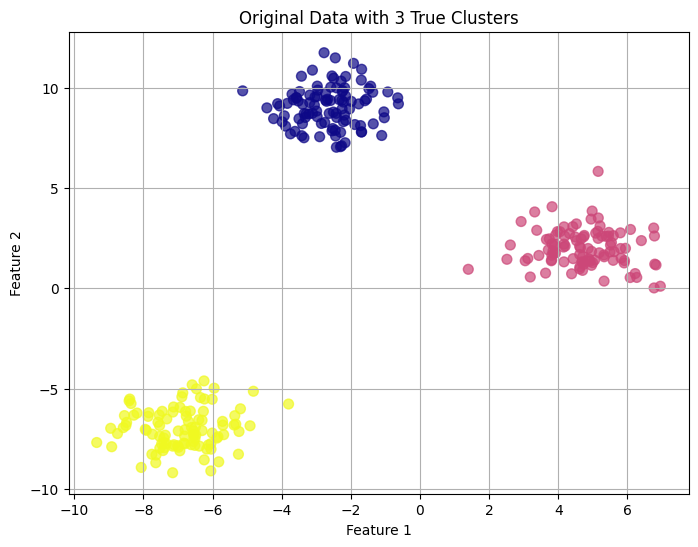

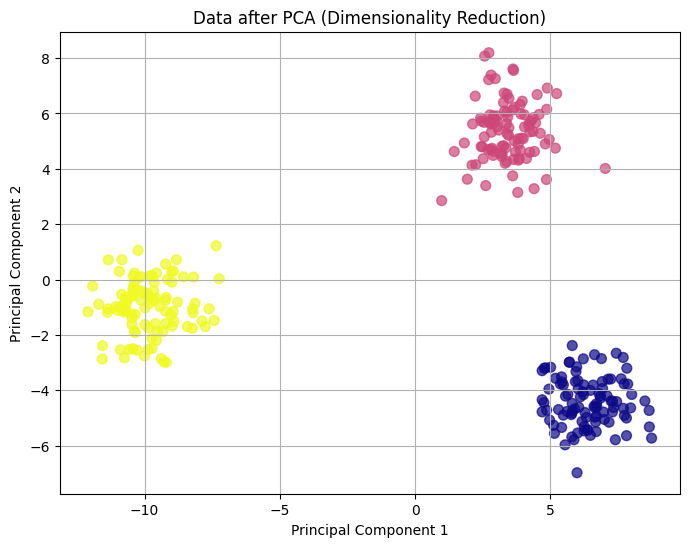

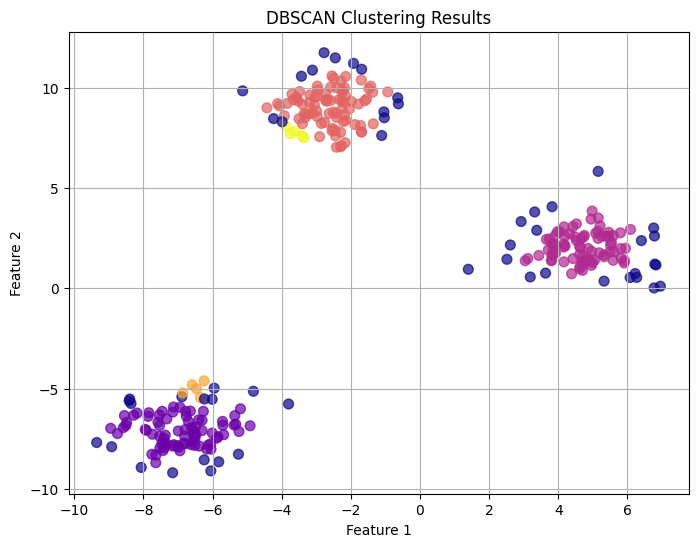

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Step 1: Generate synthetic dataset with 3 clusters
# Each cluster has some variance controlled by cluster_std
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Visualize the original dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='plasma', s=50, alpha=0.7)
plt.title('Original Data with 3 True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Step 3: Perform PCA for dimensionality reduction
# In this case, it reduces data to 2 dimensions (already 2D, so no visible change)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Visualize the dataset after PCA transformation
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='plasma', s=50, alpha=0.7)
plt.title('Data after PCA (Dimensionality Reduction)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 5: Apply DBSCAN clustering
# `eps` defines the maximum distance between points to be considered in the same neighborhood
# `min_samples` is the minimum number of points in a neighborhood to form a core point
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Step 6: Visualize the DBSCAN clustering results
# Points labeled as -1 by DBSCAN are considered noise
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='plasma', s=50, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the dataset
try:
    file_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
    employee_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Step 1: Separate numerical and categorical columns
numeric_columns = employee_data.select_dtypes(include='number').columns
categorical_columns = employee_data.select_dtypes(include='object').columns

# Step 2: Define preprocessing pipelines
numeric_transformer = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

# Step 3: Apply preprocessing steps individually
try:
    # Preprocessing numerical columns
    numeric_data = numeric_transformer.fit_transform(employee_data[numeric_columns])
    
    # Preprocessing categorical columns
    categorical_data = categorical_transformer.fit_transform(employee_data[categorical_columns])
    
    # Combine the processed numeric and categorical data into a single dataframe
    numeric_df = pd.DataFrame(numeric_data, columns=numeric_columns)
    categorical_df = pd.DataFrame(categorical_data.toarray(),
    columns=categorical_transformer.named_steps['onehotencoder'].get_feature_names_out())
    preprocessed_data = pd.concat([numeric_df, categorical_df], axis=1)
    
    print("Preprocessing completed successfully.")
except Exception as e:
    print(f"Error during preprocessing: {e}")


Dataset loaded successfully.
Preprocessing completed successfully.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Specify the correct file path (adjusted to your provided path)
file_path = "C:/Users/preya/OneDrive/Desktop/Data Science/Final Project file/preyash/employee dataset.csv"

# Load your dataset
try:
    employee_data = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found. Please check the file path: {file_path}")
    exit()
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Check for missing values
if employee_data.isnull().values.any():
    print("Warning: Dataset contains missing values. Please handle them appropriately.")
    # Handle missing values here, such as imputation or removal

# Separate features and target variable
X = employee_data.drop(columns=['PaymentTier'])  # Replace 'PaymentTier' with your target column
y = employee_data['PaymentTier']

# Split the dataset into training and testing sets
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Splitting dataset into training and testing sets completed successfully.")
except Exception as e:
    print(f"Error during dataset splitting: {e}")
    exit()

# Check if any of the variables are None after splitting
if any(v is None for v in [X_train, X_test, y_train, y_test]):
    print("Error: One or more variables are None after dataset splitting.")
    exit()


Dataset loaded successfully.
Splitting dataset into training and testing sets completed successfully.


In [5]:
# Define three different values of k
k_values = [3, 7, 15]

# Discuss the reasons for choosing each value of k
for k in k_values:
    print(f"Value of k: {k}")
    print("Reasons for choosing this value:")
    if k == 3:
        print("- Captures more local information")
        print("- Less influenced by outliers")
        print("- Can capture complex patterns in the data")
    elif k == 7:
        print("- Strikes a balance between local information and outlier reduction")
        print("- Provides a good trade-off between bias and variance")
        print("- Offers robustness against noise while capturing meaningful patterns")
    elif k == 15:
        print("- Generalizes better and more robust to noise and outliers")
        print("- Smooth decision boundary")
        print("- Better generalization to unseen data")
    print("\n")


Value of k: 3
Reasons for choosing this value:
- Captures more local information
- Less influenced by outliers
- Can capture complex patterns in the data


Value of k: 7
Reasons for choosing this value:
- Strikes a balance between local information and outlier reduction
- Provides a good trade-off between bias and variance
- Offers robustness against noise while capturing meaningful patterns


Value of k: 15
Reasons for choosing this value:
- Generalizes better and more robust to noise and outliers
- Smooth decision boundary
- Better generalization to unseen data




In [6]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the dataset
data_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
employee_data = pd.read_csv(data_path)

# Assuming you have categorical data to encode and numerical data to scale
categorical_cols = employee_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = employee_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('PaymentTier')  # Assuming 'PaymentTier' is your target column

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = employee_data.drop(columns=['PaymentTier'])
y = employee_data['PaymentTier']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the values of K
k_values = [3, 7, 15]

for k in k_values:
    print(f"\nUsing K = {k}")

    # Create a KNeighborsClassifier instance
    knn = KNeighborsClassifier(n_neighbors=k)

    # 1. Calculate the distance
    # The KNeighborsClassifier calculates the distances between the new data points and the training data points
    # using the specified distance metric (Euclidean distance by default)

    # 2. Find the nearest neighbors
    # The KNeighborsClassifier finds the K nearest neighbors for each data point in the training set
    # based on the calculated distances
    knn.fit(X_train_preprocessed, y_train)

    # You can access the indices of the nearest neighbors for each data point in the training set
    nearest_neighbors = knn.kneighbors(X_train_preprocessed, return_distance=False)
    print("Indices of the nearest neighbors for the first 5 training data points:")
    print(nearest_neighbors[:5])

    # 3. Making predictions
    # For classification tasks, the KNeighborsClassifier assigns the majority class among the K nearest neighbors
    # to the new data point
    predictions = knn.predict(X_test_preprocessed)
    print("\nFirst 5 predictions:")
    print(predictions[:5])



Using K = 3
Indices of the nearest neighbors for the first 5 training data points:
[[   0 2870 2857]
 [ 987   42  951]
 [3369    2 2524]
 [   3 2709  408]
 [   4 2045 3575]]

First 5 predictions:
[3 3 2 2 3]

Using K = 7
Indices of the nearest neighbors for the first 5 training data points:
[[   0 2870 2857 1699 3175 1879  836]
 [   1  533 1242  199  951   42  987]
 [3369    2 2524 2483 1736  452 3204]
 [   3 2709  408 2481 2410 2962 1626]
 [2045    4 3575  361 3186 2023  206]]

First 5 predictions:
[3 3 3 2 3]

Using K = 15
Indices of the nearest neighbors for the first 5 training data points:
[[   0 2870 2857 1699 3175 1879  836 1797 2340 3240 1023 1824 2153 2960
   845]
 [ 199 3614  906 2148  832  743 3637 2444  987  951   42 1242    1  163
   533]
 [3369    2 2483 2524 1736  452 1930 3204 3488  767 3349 3269 1855 3098
  2296]
 [   3 2709 2481  408 2410 2962 1626 3679 3347 3549  728 1143 3168 2405
   519]
 [   4 2045 3575 3186  361 2023  206 1680 1976 1313  549  964 3103 3467
  256

In [7]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
employee_data = pd.read_csv(data_path)

# Assuming you have categorical data to encode and numerical data to scale
categorical_cols = employee_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = employee_data.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('PaymentTier')  # Assuming 'PaymentTier' is your target column

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = employee_data.drop(columns=['PaymentTier'])
y = employee_data['PaymentTier']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the values of K
k_values = [3, 7, 15]

for k in k_values:
    print(f"\nUsing K = {k}")

    # Create a KNeighborsClassifier instance
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train_preprocessed, y_train)

    # Calculate the accuracy on the training set
    y_train_pred = knn.predict(X_train_preprocessed)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Accuracy on the training set: {train_accuracy:.2f}")

    # Calculate the accuracy on the test set
    y_test_pred = knn.predict(X_test_preprocessed)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy on the test set: {test_accuracy:.2f}")



Using K = 3
Accuracy on the training set: 0.84
Accuracy on the test set: 0.78

Using K = 7
Accuracy on the training set: 0.83
Accuracy on the test set: 0.82

Using K = 15
Accuracy on the training set: 0.82
Accuracy on the test set: 0.82


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Load the dataset
data_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
data = pd.read_csv(data_path)

# Determine categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('PaymentTier')  # Exclude target column from numerical features

# Set up preprocessing for both numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Standardize numerical columns
        ('cat', OneHotEncoder(), categorical_cols)  # Encode categorical columns
    ]
)

# Define features (X) and target (y)
X = data.drop(columns=['PaymentTier'])
y = data['PaymentTier']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Specify the K values to test
k_values = [3, 7, 15]

# Loop through each K value and evaluate the classifier
for k in k_values:
    print(f"\nEvaluating model with K = {k}")

    # Initialize and train the K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_preprocessed, y_train)

    # Predict on the test set
    y_test_pred = knn.predict(X_test_preprocessed)

    # Calculate evaluation metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')

    # Display the results
    print(f"Test Set Accuracy: {test_accuracy:.2f}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\nExplanation of Results:")
    print(f"- Accuracy: Indicates how often the model's predictions were correct. Here, it's {test_accuracy:.2f}.")
    print("- Confusion Matrix: Provides a detailed breakdown of correct and incorrect predictions.")
    print(f"- Precision: Represents accuracy of positive predictions. This model achieved a precision of {precision:.2f}.")
    print(f"- Recall: Reflects the model's ability to correctly identify all positive cases, which is {recall:.2f}.")



Evaluating model with K = 3
Test Set Accuracy: 0.78
Confusion Matrix:
[[  3   9  29]
 [ 13 111  61]
 [ 21  69 615]]
Precision: 0.78
Recall: 0.78

Explanation of Results:
- Accuracy: Indicates how often the model's predictions were correct. Here, it's 0.78.
- Confusion Matrix: Provides a detailed breakdown of correct and incorrect predictions.
- Precision: Represents accuracy of positive predictions. This model achieved a precision of 0.78.
- Recall: Reflects the model's ability to correctly identify all positive cases, which is 0.78.

Evaluating model with K = 7
Test Set Accuracy: 0.82
Confusion Matrix:
[[  1  10  30]
 [  3 123  59]
 [  2  63 640]]
Precision: 0.80
Recall: 0.82

Explanation of Results:
- Accuracy: Indicates how often the model's predictions were correct. Here, it's 0.82.
- Confusion Matrix: Provides a detailed breakdown of correct and incorrect predictions.
- Precision: Represents accuracy of positive predictions. This model achieved a precision of 0.80.
- Recall: Refl

C:\Users\preya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Load the dataset
file_path = "C:\\Users\\preya\\OneDrive\\Desktop\\Data Science\\Final Project file\\preyash\\employee dataset.csv"
employee_data = pd.read_csv(file_path)

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
numerical_cols.remove('PaymentTier')  # Assuming 'PaymentTier' is your target column

# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Define features and target
X = data.drop(columns=['PaymentTier'])
y = data['PaymentTier']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Define the values of K
k_values = [3, 7, 15]

for k in k_values:
    print(f"\nUsing K = {k}")

    # Create a KNeighborsClassifier instance
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model to the training data
    knn.fit(X_train_preprocessed, y_train)

    # Make predictions on the test set
    y_test_pred = knn.predict(X_test_preprocessed)

    # Calculate the accuracy on the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Accuracy on the test set: {test_accuracy:.2f}")

    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    print("Confusion Matrix:")
    print(cm)

    # Calculate the precision score
    precision = precision_score(y_test, y_test_pred, average='weighted')
    print(f"Precision Score: {precision:.2f}")

    # Calculate the recall score
    recall = recall_score(y_test, y_test_pred, average='weighted')
    print(f"Recall Score: {recall:.2f}")

    # Discussion of results
    print("Discussion of Results:")
    print(f"With K={k}, the model achieves an accuracy of {test_accuracy:.2f},"
          " + indicating how often the classifier is correct overall.")
    print(f"The confusion matrix for K={k} is:\n{cm}")
    print("This matrix helps us see the misclassifications: how many predictions are false positives and false negatives.")
    print(f"Precision for K={k} is {precision:.2f}, showing the accuracy of positive predictions.")
    print(f"Recall for K={k} is {recall:.2f}, showing the ability to find all positive samples.")
    print("A higher K tends to smooth predictions by considering more neighbors," + 
          " potentially reducing noise but increasing the chance of missing out on finer details.\n")



Using K = 3
Accuracy on the test set: 0.78
Confusion Matrix:
[[  3   9  29]
 [ 13 111  61]
 [ 21  69 615]]
Precision Score: 0.78
Recall Score: 0.78
Discussion of Results:
With K=3, the model achieves an accuracy of 0.78, + indicating how often the classifier is correct overall.
The confusion matrix for K=3 is:
[[  3   9  29]
 [ 13 111  61]
 [ 21  69 615]]
This matrix helps us see the misclassifications: how many predictions are false positives and false negatives.
Precision for K=3 is 0.78, showing the accuracy of positive predictions.
Recall for K=3 is 0.78, showing the ability to find all positive samples.
A higher K tends to smooth predictions by considering more neighbors, potentially reducing noise but increasing the chance of missing out on finer details.


Using K = 7
Accuracy on the test set: 0.82
Confusion Matrix:
[[  1  10  30]
 [  3 123  59]
 [  2  63 640]]
Precision Score: 0.80
Recall Score: 0.82
Discussion of Results:
With K=7, the model achieves an accuracy of 0.82, + in

C:\Users\preya\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
